<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/MATH%26ML_8_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D0%B5%D0%B2_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Задание 3.4

Дана часть датасета о домах в штате Айова, состоящая из 15 наблюдений:

Найдите уникальных кандидатов на пороговое значение  для фактора *Lot Frontage*.

In [8]:
import numpy as np
import pandas as pd

# path = '/content/AmesHousing.zip'
path = 'https://raw.githubusercontent.com/akitim/datasets/main/AmesHousing.zip'
ames_data = pd.read_csv(path)
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)
ames_sample

,Lot Frontage,Lot Area,SalePrice
0,60.0,11040,108000
1,96.0,10628,193000
2,68.0,9717,142125
3,50.0,9060,150909
4,92.0,9215,204500
5,80.0,10386,305900
6,60.0,7350,139000
7,72.0,8640,229800
8,56.0,6956,97900
9,70.0,12886,175000


In [9]:
LF_sorted = ames_sample['Lot Frontage'].sort_values().drop_duplicates()
# LF_sorted
candidates = LF_sorted.rolling(2).mean().dropna()
candidates

8      53.0
0      58.0
14     61.0
2      65.0
9      69.0
7      71.0
5      76.0
4      86.0
1      94.0
12    101.0
Name: Lot Frontage, dtype: float64

Задание 3.5
1 point possible (graded)

Для части датасета о домах в Айове из предыдущего задания найдите уникальных кандидатов на пороговое значение  для фактора *Lot Area*.

In [10]:
ames_sample['Lot Area'].sort_values().drop_duplicates().\
    rolling(2).mean().dropna()

8      5508.0
6      7153.0
14     7425.0
13     7949.0
12     8405.5
7      8526.5
3      8850.0
4      9137.5
2      9466.0
5     10051.5
1     10507.0
0     10834.0
11    11365.0
9     12288.0
Name: Lot Area, dtype: float64

In [11]:
def find_candidates_for_thresholds(x, y):
    x_roll_mean = x.sort_values().drop_duplicates().rolling(2).mean().dropna()
    y_roll_mean = y[x_roll_mean.index].diff()
    return x_roll_mean[y_roll_mean != 0].values

def squared_error(y):
    y_pred = np.mean(y)
    return (y - y_pred) @ (y - y_pred) / len(y)

def entropy(y):
    p = np.unique(y, return_counts=True)[1] / y.size
    return - p @ np.log2(p)

def split(X, y, split_params):
    X_ = X.copy()
    # if type(X_) in [pd.DataFrame, pd.Series]:
    #     X_ = X_.values
    j, t = split_params
    predicat = X.iloc[:, j] <= t
    X_left, y_left, X_right, y_right = \
        X_[predicat], y[predicat], X_[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

def calculate_weighted_impurity(X, y, split_params, crit):
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right = y.size, y_left.size, y_right.size
    return N_left / N * crit(y_left) + N_right / N * crit(y_right)

def best_split(X, y, crit):
    M = X.shape[1]
    min_wt_imp = np.inf
    opt_split_params = None
    for j in range(M):
        thrs = find_candidates_for_thresholds(X.iloc[:, j], y)
        for t in thrs:
            split_params = j, t
            wt_imp = calculate_weighted_impurity(X, y, split_params, crit)
            if wt_imp < min_wt_imp:
                min_wt_imp = wt_imp
                opt_split_params = split_params
    return opt_split_params


In [12]:
y_ = np.random.randint(0, 5, 100)
p = np.unique(y_, return_counts=True)[1] / y_.size
- p @ np.log2(p)


2.2621992148282724

In [13]:
X = ames_sample[['Lot Frontage', 'Lot Area']]
y = ames_sample['SalePrice']

best_split(X, y, squared_error)

(0, 71.0)

### Задание 4.5

Дана часть датасета о банкнотах, состоящая из 15 наблюдений:

Найдите оптимальные для построения решающего пня параметры разбиения $j$ и $t$. Для этого воспользуйтесь функцией `best_split()`, которую мы реализовали ранее. В качестве критерия информативности используется энтропию Шеннона.
1. На основе какого фактора $x_j$ будет построено решающее правило в корневой вершине?
2. Чему равно оптимальное пороговое значение ? Ответ **округлите до трёх знаков после точки-разделителя**.
3. Чему равно значение взвешенной неоднородности после разбиения при найденных оптимальных параметрах сплита? Ответ **округлите до двух знаков после точки-разделителя**.


In [14]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/bill_authentication.csv'

bill_data = pd.read_csv(path)
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15,
    random_state=42,
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [15]:
j_opt, t_opt = best_split(X, y, crit=entropy)
print('Решающее правило в корневой вершине будет построено на основе фактора',
       X.columns[j_opt])
print('Оптимальное пороговое значение:', np.round(t_opt, 3))

wt_imp = calculate_weighted_impurity(X, y, (j_opt, t_opt), entropy)
print('Значение взвешенной неоднородности после разбиения\n',
      'при найденных оптимальных параметрах:', np.round(wt_imp, 2))

Решающее правило в корневой вершине будет построено на основе фактора Skewness
Оптимальное пороговое значение: 3.221
Значение взвешенной неоднородности после разбиения
 при найденных оптимальных параметрах: 0.46


[Text(0.5, 0.75, 'x[1] <= 3.221\nentropy = 0.722\nsamples = 15\nvalue = [12, 3]'),
 Text(0.25, 0.25, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]')]

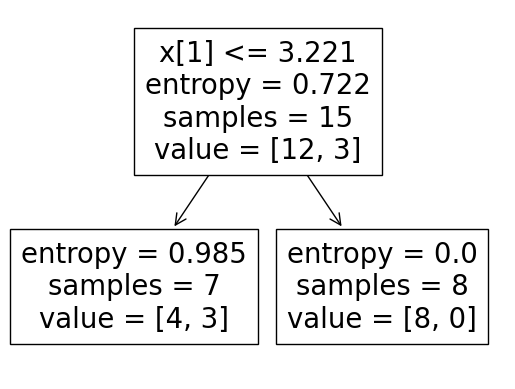

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
dt.fit(X, y)

plot_tree(dt)

In [29]:
class Node:
    def __init__(self, left=None,
                 right=None, value=None,
                 split_params=None, impurity=None,
                 samples=None, is_leaf=False, n_features=None):

        self.left = left
        self.right = right
        self.split_params = split_params
        self.value = value
        self.impurity = impurity
        self.samples = samples
        self.is_leaf = is_leaf
        self.n_features = n_features
        # self.is_root = is_root

def create_leaf_prediction(y):
    return pd.Series(y_).mode()[0]

def stop_crit(X, y, crit):
    return crit(y) == 0

def build_decision_tree(X, y, crit):
    if stop_crit(X, y, crit):
        value = create_leaf_prediction(y)
        node = Node(
            value=value,
            impurity=crit(y),
            samples=y.size,
            is_leaf=True,
            n_features = X.shape[1]
        )
    else:
        split_params = best_split(X, y, crit=crit)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, crit)
        right = build_decision_tree(X_right, y_right, crit)
        node = Node(
            left=left, right=right,
            split_params=split_params,
            impurity=crit(y),
            samples=y.size,
            n_features = X.shape[1]
        )

    return node

def predict_sample(node, x):
    if node.is_leaf:
        return node.value
    j, t = node.split_params
    if x[j] <= t:
        return predict_sample(node.left, x)
    else:
        return predict_sample(node.right, x)

def predict(decision_tree, X):
    predictions = [predict_sample(decision_tree, x) for x in X.values]
    return np.array(predictions)

def print_decision_tree(node, depth=0):
    depth += 1
    if node.is_leaf:
        print('   ' * depth, 'class: {}'.format(node.value))
    else:
        print('   ' * depth, 'feature_{} <= {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.left, depth=depth)
        print('   ' * depth, 'feature_{} > {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.right, depth=depth)

def get_max_depth(node):
    def get_depth(node):
        left_depth = get_depth(node.left) if node.left else 0
        right_depth = get_depth(node.right) if node.right else 0
        return max(left_depth, right_depth) + 1
    return get_depth(node) - 1

def list_all_split_params(node):
    def get_list(node, split_params_ls):
        if not node.is_leaf:
            split_params_ls += [node.split_params]
            get_list(node.left, split_params_ls=split_params_ls)
            get_list(node.left, split_params_ls=split_params_ls)
    split_params_ls = []
    get_list(node, split_params_ls)

    return split_params_ls

def calculate_feature_importances(node, feature_importances=None):
    if feature_importances is None:
        feature_importances = np.zeros(node.n_features)
    if not node.is_leaf:
        j = node.split_params[0]
        feature_importances[j] += node.samples * node.impurity - \
            node.left.samples * node.left.impurity - \
            node.right.samples * node.right.impurity

        calculate_feature_importances(node.left, feature_importances)
        calculate_feature_importances(node.right, feature_importances)

    feature_importances /= node.samples * np.sum(feature_importances)
    return feature_importances

### Задание 5.3

Дана часть датасета о банкнотах, состоящая из 15 наблюдений.

Постройте дерево решений на обучающей выборке с помощью функции `build_decision_tree()`. В качестве критерия информативности используйте энтропию Шеннона.
1. Сколько вершин дерева используют в качестве признака разбиения фактор $x_1(Variance)$?
2. Чему равна глубина полученного дерева?

In [18]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/bill_authentication.csv'

bill_data = pd.read_csv(path)
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15,
    random_state=42,
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [31]:
from sklearn.tree import export_text, plot_tree, DecisionTreeClassifier

decision_tree = build_decision_tree(X, y, crit=entropy)
decision_tree_skl = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_skl.fit(X, y)

ls = list_all_split_params(decision_tree)
ind = 0
print (f'В качестве признака разбиения фактор {bill_sample.columns[ind]}',
       'используют вершин дерева:', len([j for (j, t) in ls if j == 0]))

# print_decision_tree(decision_tree)
# plot_tree(decision_tree_skl);
# print('\n\n', export_text(decision_tree_skl))
print('Глубина полученного дерева:', get_max_depth(decision_tree))

В качестве признака разбиения фактор Variance используют вершин дерева: 6
Глубина полученного дерева: 5


### Задание 5.4

В вершину под номером $v$ на этапе обучения попало $N_v=18$ наблюдений. Из них 10 относятся к классу 0, а оставшиеся 8 — к классу 1. Параметр `min_samples_split = 8`. Произойдёт ли разделение данной вершины на две?

Дополнительные ограничения (за исключением достижения однородности) на ветвление дерева не установлены. В качестве критерия информативности используется критерий Джини.
Ответ - да.

Задание 6.3

Дано дерево решений, решающее задачу классификации людей на тех, кто зарабатывает > 50 тысяч долларов (класс 1), и тех, кто зарабатывает меньше этой суммы (класс 0).
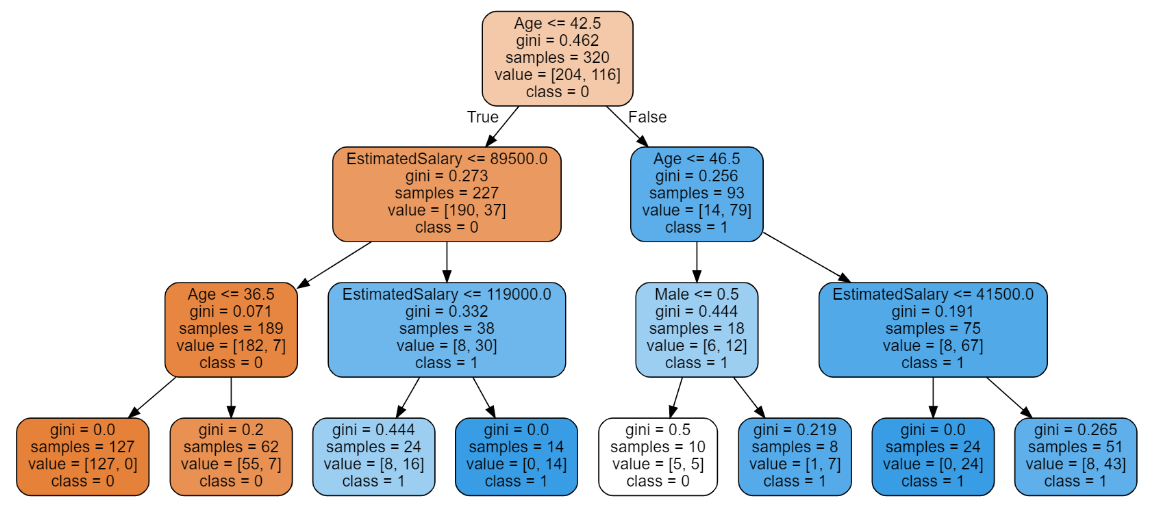

Рассчитайте абсолютную значимость признака возраст age для данного дерева. Ответ **округлите до трёх знаков после точки-разделителя**.

In [20]:
import numpy as np
F = [0.462 * 320 - 0.273 * 227 - 0.256 * 93,
     0.071 * 189 - 0 * 127 - 0.2 * 62,
     0.256 * 93 - 0.444 * 18 - 0.191 * 75]
np.round(np.sum(F) / 320, 3)

0.202

In [32]:
calculate_feature_importances(decision_tree)

array([0.06358729, 0.00307938])

##7/10  7. Деревья решений: практика

Набор данных состоит из 3 168 записанных образцов голоса мужчин и женщин. Образцы предварительно обрабатываются с помощью акустического анализа на языке программирования R с использованием специальных библиотек в диапазоне частот 0 Гц-280 Гц (диапазон человеческого голоса).\
Оригинальную страницу датасета на Kaggle с подробным описанием задачи вы можете найти [здесь](https://www.kaggle.com/datasets/primaryobjects/voicegender).

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [46]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/voice_gender.zip'

voice_data = pd.read_csv(path)
voice_data.sample()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2797,0.182168,0.037332,0.171089,0.159208,0.217426,0.058218,2.864532,12.829191,0.843869,0.234807,...,0.182168,0.158587,0.049741,0.277457,1.33729,0.023438,10.734375,10.710938,0.090647,female


In [47]:
X = voice_data.drop('label', axis=1).values
y = voice_data['label'].values

# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


### Задание 7.1

Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. На основе какого фактора будет построено решающее правило в корневой вершине?
2. Чему равно оптимальное пороговое значение для данного фактора? Ответ **округлите до трёх знаков после точки-разделителя**.
3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ **округлите до одного знака после точки-разделителя**. Не указывайте в ответе символ %.
4. Сделайте предсказание и рассчитайте значение метрики *accuracy* на тестовой выборке. Ответ **округлите до трёх знаков после точки-разделителя**.



Решающее правило в корневой вершине будет построено на основе фактора meanfun
Оптимальное пороговое значение для данного фактора: 0.142
Процентов наблюдений, для которых выполняется заданное в корневой вершине условие, 
содержится в обучающей выборке: 51.1
Accuracy на тесте: 0.956


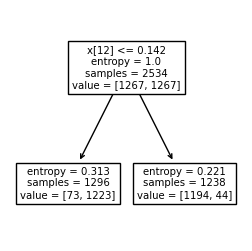

In [48]:
stump = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')
stump.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
stump_graph = tree.plot_tree(stump)

ind = stump.tree_.feature[0]
print('Решающее правило в корневой вершине будет построено',
       'на основе фактора', voice_data.columns[ind])

print('Оптимальное пороговое значение для данного фактора:',
      round(stump.tree_.threshold[0], 3))

print('Процентов наблюдений, для которых выполняется заданное в корневой вершине',
      'условие, \nсодержится в обучающей выборке:',
      round(stump.tree_.n_node_samples[1] / X_train.shape[0] *100, 1))

y_pred = stump.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print ('Accuracy на тесте:', round(acc, 3))

### Задание 7.2

Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений:\
A meanfreq (средняя частота)\
B median (медианная частота)\
C IQR (межквартильный размах частот)\
D meanfun (средняя основная частота в акустическом спектре)\
E minfun (минимальная основная частота в акустическом спектре)\
F Q25 (первый квартиль частоты)

2. Сколько листьев в построенном дереве содержат в качестве предсказания класс `female`? Для того, чтобы отобразить имена классов при визуализации дерева решения с помощью функции `plot_tree()`, укажите параметр `class_names=dt.classes_`.
3. Сделайте предсказание и рассчитайте значение метрики *accuracy* на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.


Признаки, использованные при построении дерева: Q25 IQR meanfun
В построенном дереве листьев, содержащих в качестве предсказания класс female : 3
Accuracy =  0.962


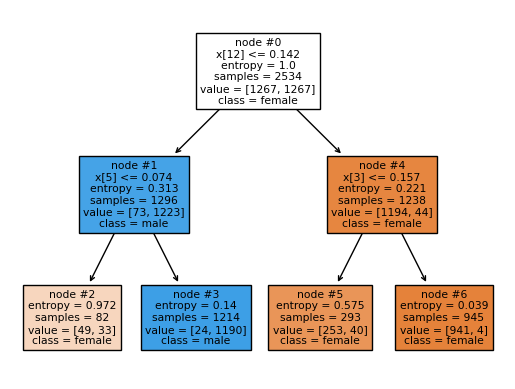

In [58]:
dt = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt.fit(X_train, y_train)

feat_importances = dt.tree_.compute_feature_importances()
indices = [i for (i, fi) in enumerate(feat_importances > 0) if fi]
print('Признаки, использованные при построении дерева:',
      *voice_data.columns[indices].to_list())

txt = tree.plot_tree(dt, filled=True, class_names=dt.classes_, node_ids=True)
leaf_indices = [i for i, n in enumerate(dt.tree_.children_left) if n == -1]
leaf_classes = [str(annot).split('class = ')[1][:-2] \
                for annot in np.asarray(txt)[leaf_indices]]
print('В построенном дереве листьев, содержащих в качестве',
      'предсказания класс female :',
      len([cl for cl in leaf_classes if cl == 'female'])
      )

y_pred = dt.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', np.round(acc, 3))

### Задание 7.3

Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.

1. Чему равна глубина полученного дерева решения? Напомним, что глубину дерева можно узнать с помощью метода `get_depth()`
2. Чему равно количество листьев в полученном дереве решений? Напомним, что количество листьев можно узнать с помощью метода `get_n_leaves()`.
3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики *accuracy* на каждой из выборок. Ответы о**круглите до трёх знаков после точки-разделителя**.

In [61]:
dt_full = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_full.fit(X_train, y_train)

print('Глубина дерева:', dt_full.get_depth())
print('Листьев в дереве:', dt_full.get_n_leaves())

y_pred_train = dt_full.predict(X_train)
y_pred_test = dt_full.predict(X_test)
acc_train = metrics.accuracy_score(y_train, y_pred_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)

print(f'Accuracy on train: {np.round(acc_train, 3)};\n',
      f'accuracy on test: {np.round(acc_test, 3)}')

Глубина дерева: 12
Листьев в дереве: 54
Accuracy on train: 1.0;
 accuracy on test: 0.973


### Задание 7.4
Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (*Grid SearchCV*).

Задана следующая сетка параметров:



In [63]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}


В качестве кросс-валидатора будем использовать *k-fold*-валидатор со стратификацией (*StratifiedKFold*):



In [64]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)


С помощью *Grid SearchCV* из модуля *model_selection* библиотеки *sklearn* переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр `random_state` для дерева решений установите равным 0. В качестве метрики качества (параметр `scoring`) используйте *accuracy*.

1. Какой критерий информативности использует наилучшая модель?
2. Чему равна оптимальная максимальная глубина?
3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?
4. С помощью наилучшей модели сделайте предсказание для обучающей и тестовой выборок. Рассчитайте значение метрики *accuracy* на каждой из выборок. Ответы **округлите до трёх знаков после точки-разделителя**.

In [72]:
gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0),
    param_grid=param_grid, n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    # return_train_score=True
    )
gs.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             scoring='accuracy')

In [75]:
print('Лучшие параметры:', gs.best_params_)

best_tree = gs.best_estimator_
acc_gs_train = metrics.accuracy_score(
    y_train, best_tree.predict(X_train))
acc_gs_test = metrics.accuracy_score(
    y_test, best_tree.predict(X_test))
print(f'Accuracy on train: {np.round(acc_gs_train, 3)};\n',
      f'accuracy on test: {np.round(acc_gs_test, 3)}')

Лучшие параметры: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
Accuracy on train: 0.996;
 accuracy on test: 0.97


### Задание 7.5

Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.

Выделите топ-3 наиболее важных факторов, участвующих в построении дерева решений:


Топ-3 факторов по значимости: meanfun IQR sfm


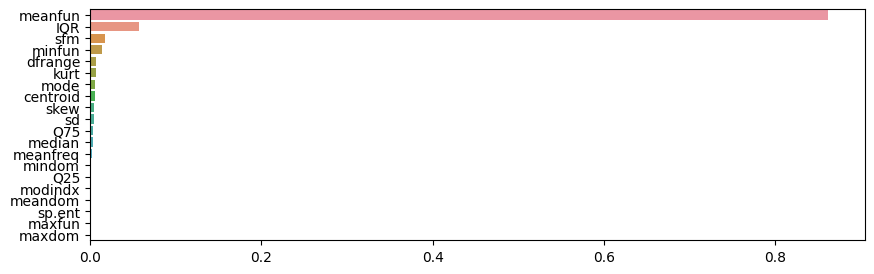

In [96]:
features = voice_data.drop('label', axis=1).columns.to_list()
feat_fi_ordered = sorted(zip(features, best_tree.feature_importances_),
                    key=lambda kv: kv[1],
                    reverse=True)
feat_ordered = [k for (k, v) in feat_fi_ordered]
fi_ordered = [v for (k, v) in feat_fi_ordered]

print('Топ-3 факторов по значимости:', *[k for (k, v) in feat_fi_ordered[:3]])

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
sns.barplot(x=fi_ordered, y=feat_ordered, orient='h');
